In [123]:

# Import library

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2 as cv
from pathlib import Path
from skimage import exposure
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [124]:
# Dir path data

train_dir = './images/images/training'
test_dir = './images/images/test'

In [125]:
# Melakukan load data dan dimasukkan ke dalam variabel train_img dan test_img

def load_img(img_list):
    p = Path(img_list)
    dirs = p.glob('*')
    
    # Penjelasan kode diatas
    # Path(img_list) = Membuat objek Path dengan parameter img_list yaitu path dari image
    # p.glob('*') = Mengambil semua file/folder yang ada pada path tersebut
    
    img_list = []
    
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
    
    # Penjelasan kode diatas
    # str(dir).split('/')[1] = Mengambil nama folder dari path tersebut
    # dir.glob('*.jpg') = Mengambil semua file yang berekstensi jpg pada folder tersebut
    # mpimg.imread(file) = Membaca file tersebut dan dimasukkan ke dalam variabel img
            
            if not img is None:
                img_list.append((img, label))
    
    # Penjelasan kode diatas
    # img_list.append((img, label)) = Memasukkan img dan label ke dalam list img_list
    
    return img_list

In [126]:
# Melakukan load data train dan test

train_img_list = load_img(train_dir)
test_img_list = load_img(test_dir)

In [127]:
# Function untuk melakukan visualisasi image secara random

def random_img_vis(img):
    rand_num = np.random.randint(0, len(img))
    
    img_rand = img[rand_num][0]
    
    plt.imshow(img_rand)
    print(f'SHape: {img_rand.shape}')
    print('Label: ', img[rand_num][1])

# Penjelasan kode diatas
# np.random.randint(0, len(img)) = Mengambil random index dari image
# img[rand_num][0] = Mengambil image tersebut berdasarkan index yang sudah di random
# plt.imshow(img_rand) = Menampilkan image tersebut yang sudah dipiulih secara random
# print(f'Shape: {img_rand.shape}') = Menampilkan shape dari image tersebut
# print('Label: ', img[rand_num][1]) = Menampilkan label dari image tersebut

SHape: (614, 857, 3)
Label:  night


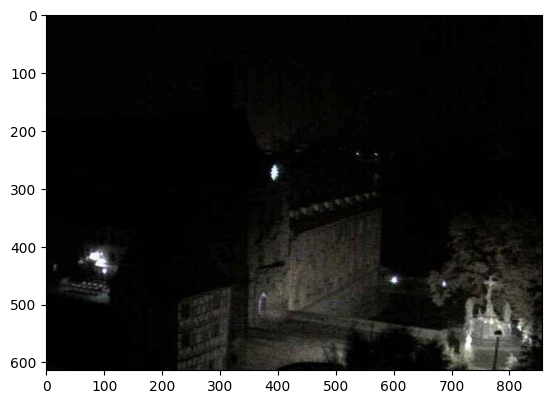

In [128]:
# Menampilkan image secara random
random_img_vis(train_img_list)

# Pre-process image

In [129]:
# Function untuk melakukan standarisasi terhadap ukuran image

def standardize_img(img):
    standardized_img = cv.resize(img, (1100, 600))
    
    return standardized_img

In [130]:
# Function untuk melakukan encoding terhadap label day dan night

def label_encoder(label):
    if label == 'day':
        return 1
    else:
        return 0

In [131]:
# Function untuk melakukan preprocessing terhadap image

def preprocess_img(img_list):
    img_list_preprocessed = []
    
    for item in img_list:
        img = item[0]
        label = item[1]
        
        img_standardized = standardize_img(img)
        encoded_label = label_encoder(label)
        
        img_list_preprocessed.append((img_standardized, encoded_label))
    
    # Penjelasan kode diatas
    # Function akan mengambil data image kemudian dilakukan perulangan untuk mengambil data per image.
    # Kemudian data per image tersebut dimasukkan ke dalam array bernama item yang dimana untuk melakukan ekstraksi 
    # data img dan label. Kemudian dilakukan standarisasi dan encoding label terhadap image dengan memanggil 
    # function standardize_img dan label_encoder. Setelah dilakukan standarisasi dan label encode
    # data tersebut akan dimasukkan ke dalam array img_list_preprocessed

    return img_list_preprocessed

In [132]:
train_std_img_list = preprocess_img(train_img_list)

SHape: (600, 1100, 3)
Label:  0


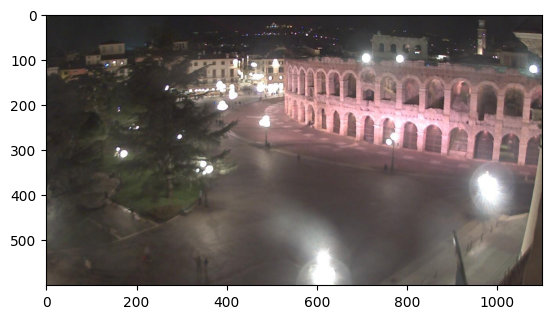

In [133]:
# Melakukan pengecekan image yang sudah dilakukan standarisasi

random_img_vis(train_std_img_list)

# Extract Feature

In [151]:
# Function untuk melakukan ekstraksi fitur pada image menjadi sebuah histogram

def extract_hist(img_list):
    histogram_img_list = []
    
    for img in img_list:
        img_data = img[0]
        img_label = img[1]
        
        hsv_img = cv.cvtColor(img_data, cv.COLOR_RGB2HSV)
        
        hist_h = cv.calcHist([hsv_img], [0], None, [20], [0, 180])
        hist_s = cv.calcHist([hsv_img], [1], None, [20], [0, 256])
        hist_v = cv.calcHist([hsv_img], [2], None, [20], [0, 256])
            
        hist_h = cv.normalize(hist_h, hist_h).flatten()
        hist_s = cv.normalize(hist_s, hist_s).flatten()
        hist_v = cv.normalize(hist_v, hist_v).flatten()
        
        hist = np.concatenate((hist_h, hist_s, hist_v))
        
        histogram_img_list.append((hist, img_label))
    
    return histogram_img_list

# Penjelasan kode diatas
# Function akan mengambil data image kemudian dilakukan perulangan untuk mengambil data per image.
# Kemudian data per image tersebut dimasukkan ke dalam array bernama img yang dimana untuk melakukan ekstraksi
# data img. Dari data img tersebut kita lakukan konversi warna RGB menjadi HSV. 
# Setelah itu dilakukan pembuatan histogram terhadap hsv_img atau img yg sudah dilakukan konversi warna
# menjadi hsv. Kemudian dilakukan normalisasi terhadap histogram dengan menggunakan cv.normalize
# Setelah dilakukan ekstraksi fitur histogram, data tersebut akan dimasukkan ke dalam array histogram_img_list

In [152]:
# Melakukan ekstraksi fitur histogram pada image train

train_hist_list = extract_hist(train_std_img_list)

In [153]:
# Memisahkan data histogram dan label ke dalam X dan y
X_train = [hist for hist, _ in train_hist_list]
y_train = [label for _, label in train_hist_list]

print("X (data histogram):", X_train[:1])
print("y (label):", y_train)

X (data histogram): [array([1.6866238e-01, 9.1938657e-01, 2.4267134e-01, 1.0271515e-01,
       3.8747013e-02, 8.2079969e-02, 1.5198849e-02, 1.3229028e-02,
       8.0094688e-02, 2.4101695e-02, 8.5571222e-02, 1.5929259e-01,
       9.1802284e-02, 6.3145575e-03, 9.3697885e-04, 4.0509648e-04,
       7.8854657e-04, 5.8445218e-04, 4.2550592e-03, 4.1066268e-03,
       7.3624998e-01, 2.3774436e-01, 9.6470527e-02, 1.4933692e-01,
       2.3753406e-01, 2.7080208e-01, 2.8252977e-01, 2.4696186e-01,
       1.9631037e-01, 1.6238907e-01, 1.4973515e-01, 9.4998412e-02,
       4.8566379e-02, 1.9629695e-02, 9.2309229e-03, 5.2978247e-03,
       3.7227960e-03, 2.6623360e-03, 1.6645193e-03, 1.3423543e-03,
       1.3230114e-02, 1.1750178e-01, 2.0857361e-01, 4.7458872e-01,
       6.1133522e-01, 3.5998827e-01, 2.0644933e-01, 1.4966883e-01,
       1.2029716e-01, 9.8448806e-02, 1.4021802e-01, 1.8423262e-01,
       1.4546566e-01, 1.4910874e-01, 1.3001035e-01, 7.2240867e-02,
       4.3954052e-02, 3.4629397e-02, 2.99

In [154]:
# Melakukan Normalisasi data histogram

def standardize_hist(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled

In [155]:
# Melakukan training menggunakan SVC

X_train = standardize_hist(X_train)

clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [160]:
# Melakukan perhitungan akurasi training

y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy: ", train_accuracy)

Train Accuracy:  1.0


# Testing Model

In [161]:
# Melakukan standarisasi image dan ekstraksi fitur histogram pada image test

test_std_img_list = preprocess_img(test_img_list)

test_hist_list = extract_hist(test_std_img_list)

X_test = [hist for hist, _ in test_hist_list]
y_test = [label for _, label in test_hist_list]

X_test = standardize_hist(X_test)

In [162]:
# Melakukan predict model dan menghitung akurasi pada model

y_pred = clf.predict(X_test)

print(f'Accuracy Model: {accuracy_score(y_test, y_pred)}')

Accuracy Model: 0.9875
